In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotnine import *
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/districting/SC14-1905_pop_bycounty.csv
/kaggle/input/gerrymander-allstates/gerrymander (1).csv
/kaggle/input/floridacities/us_cities.csv
/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.shx
/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.prj
/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.dbf
/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.shp
/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.shp.xml
/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.cpg
/kaggle/input/florida-data/FL_l2_2022stats_county.csv


# Due Dates
* Paragraph due on Monday, (November 11th) (Done)


* 1 Page overview:Topic Background,Motivating Question, Important Parameters, Hypotheses for the Conclusions. (November 18th) (Done)


* 4 minute Presentation of Background Overview (November 19th) (Done)


* 1 Page Model Description (November 25th)


* Model Description Presentation (November 26th)


* Rough Draft (December 3rd)


* Final Notebook (December 10th)

# Introduction

We are conducting research on the drawing of congressional voting districts in the state of Florida in hopes to find a solution that reduces gerrymandering. Gerrymandering is harmful to the political state of the United States, and can skew the outcome of both local and national elections. Florida is a well known culprit of gerrymandering, repeatedly redrawing political districts in order to change the outcome of the election and favor of political parties. Gerrymandering is harmful to the political state of the United States, and can skew the outcome of both local and national elections.Florida is a well known culprit of gerrymandering, repeatedly redrawing political districts in order to change the outcome of the election and favor of political parties. We aimed in this project to create a model based using the traveling sales person model we learned in class, to find how to redistrict counties in the fairest way. 








**Motivating Question:** How can we draw the most unbiased congressional districts in the state of Florida?

“Suppose you were given the opportunity to draw congressional districts for a state. How would you do so as a purely "baseline" exercise to create the "simplest" shapes for all the districts in a state? The rules include only that each district in the state must contain the same population.” - 
MCM/ICM 2007 Problems problem A.


**Hypothesis**: Our end goal is to find a fairer, unbiased model that reduces gerrymandering in Florida. The traveling salesperson model allows us to find a method for optimizing districting and swapping counties in districts when needed. We hypothesize that there is a possible fairer districting of Florida compared to the current method.

# Background

The state of Florida is known for its gerrymandering, a method of districting counties to give unfair advantage to a political party. Gerrymandering is harmful to the political state of the United States, and can skew the outcome of both local and national elections. There has been research done to evaluate fairness of districting, and formulas have been proposed to assess this. One of these formulas is Polsby Popper compactness, evaluating geographical compactness so no disctrics are shaped in unnatural ways. An example of this is "The exceedingly long perimeters of the 1st and 12th congressional districts of North Carolina were cited in the recent U.S. Supreme Court case Cooper v. Harris, in which the Court ruled that both districts were the result of unconstitutional racial gerrymandering. At the time, these were two of the three congressional districts across the country with the smallest Polsby–Popper scores." (https://www.tandfonline.com/doi/full/10.1080/00029890.2018.1517571). 


# Model Descriptions



For our model, we are attempting to find an optimal way to district counties in Florida. The state of Florida is known for its gerrymandering, a method of districting counties to give unfair advantage to a political party. We plan on using a model to find an optimized districting in three parts: using current data to analyze aspects of districing, using local search algorithms to meaningfully change districting, and evaluating our new districts with established techniques. 

In our analysis of the current districts of Florida, we will create a data frame with categories such as diversity of sex, race, age, divisions of major cities, and more. We will analyze these by county. In this step we will also use the evaluations of districting, including methods such as one person one vote, Polsby–Popper compactness, Bounded efficiency gap, and shortest-splitline (Full article: An Impossibility Theorem for Gerrymandering). We can, after our redistricting, compare the actual districting scores to our changes.  

Our filtering will be accomplished using local-source algo and simulated annealingrithms. Simulated annealing is a process of “a material is heated to a high temperature and cooled… we define an initial temperature, often set as 1, and a minimum temperature, on the order of 10^-4. The current temperature is multiplied by some fraction alpha and thus decreased until it reaches the minimum temperature” ( Simulated Annealing - GeeksforGeeks). In our model, we can apply this idea by setting an optimal state of districting and change the current districting to reach this. 

**Parameters:** Population

Geographical structuring of Florida

Party voting habits

Current districing of the state

Census data on Florida voters

In [2]:
df_new = pd.read_csv("/kaggle/input/florida-data/FL_l2_2022stats_county.csv")
mapdf = pd.read_csv("/kaggle/input/floridacities/us_cities.csv")
districts = pd.read_csv("/kaggle/input/districting/SC14-1905_pop_bycounty.csv")

Our first dataframe includes information on voters in Florida counties including age, gender, voting history, ethnicity, and more.

Our second dataset has the latitude and longitude for cities in the United States, and also includes their count

Our third dataset contains districts and their countiesy.

In [3]:
districts

,district,fips,county,tpop10,srwpop10,nhbpop10,hbpop10,hxbpop10,othpop10,tvap10,...,nhbpop00,hbpop00,hxbpop00,othpop00,tvap00,srwvap00,nhbvap00,hbvap00,hxbvap00,othvap00
0,1,33,Escambia,297619,196901,70818,1328,12733,15839,233465,...,64075,681,7254,13722,225139,166992,42224,408,5405,10110
1,1,59,Holmes,11489,10842,142,1,197,307,8921,...,93,6,131,267,7934,7575,65,1,90,203
2,1,91,Okaloosa,180822,139500,18587,809,11487,10439,140434,...,16444,441,6861,8693,128365,106260,10926,240,4669,6270
3,1,113,Santa Rosa,151372,128726,9118,402,6105,7021,115163,...,5249,151,2817,4607,86474,77756,3543,75,1839,3261
4,1,131,Walton,55043,46857,3438,61,2860,1827,43713,...,2906,38,842,1390,31806,27975,2165,33,580,1053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,51,Hendry,39140,13650,5195,273,18970,1052,28254,...,5372,120,14216,612,25336,12076,3506,73,9260,421
95,25,86,Miami-Dade,491074,35689,8845,10255,430224,6061,388985,...,9027,7187,367792,6333,337943,31065,6711,5572,289961,4634
96,26,86,Miami-Dade,623255,75043,76473,12335,445374,14030,468126,...,71460,6372,318014,12988,363967,66769,45118,4309,238468,9303
97,26,87,Monroe,73090,52089,4167,463,14608,1763,62089,...,3833,306,12247,1741,65984,52384,2777,210,9243,1370


In [4]:
districts

,district,fips,county,tpop10,srwpop10,nhbpop10,hbpop10,hxbpop10,othpop10,tvap10,...,nhbpop00,hbpop00,hxbpop00,othpop00,tvap00,srwvap00,nhbvap00,hbvap00,hxbvap00,othvap00
0,1,33,Escambia,297619,196901,70818,1328,12733,15839,233465,...,64075,681,7254,13722,225139,166992,42224,408,5405,10110
1,1,59,Holmes,11489,10842,142,1,197,307,8921,...,93,6,131,267,7934,7575,65,1,90,203
2,1,91,Okaloosa,180822,139500,18587,809,11487,10439,140434,...,16444,441,6861,8693,128365,106260,10926,240,4669,6270
3,1,113,Santa Rosa,151372,128726,9118,402,6105,7021,115163,...,5249,151,2817,4607,86474,77756,3543,75,1839,3261
4,1,131,Walton,55043,46857,3438,61,2860,1827,43713,...,2906,38,842,1390,31806,27975,2165,33,580,1053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,51,Hendry,39140,13650,5195,273,18970,1052,28254,...,5372,120,14216,612,25336,12076,3506,73,9260,421
95,25,86,Miami-Dade,491074,35689,8845,10255,430224,6061,388985,...,9027,7187,367792,6333,337943,31065,6711,5572,289961,4634
96,26,86,Miami-Dade,623255,75043,76473,12335,445374,14030,468126,...,71460,6372,318014,12988,363967,66769,45118,4309,238468,9303
97,26,87,Monroe,73090,52089,4167,463,14608,1763,62089,...,3833,306,12247,1741,65984,52384,2777,210,9243,1370


In [5]:
#filters data down to the only two rows that we need (district and county)
districts = districts [['district', 'county']]

In [6]:
districts

,district,county
0,1,Escambia
1,1,Holmes
2,1,Okaloosa
3,1,Santa Rosa
4,1,Walton
...,...,...
94,25,Hendry
95,25,Miami-Dade
96,26,Miami-Dade
97,26,Monroe


In [7]:
#filter the mapdf data down to only include "CITY", "COUNTY", "LATITUDE", "LONGITUDE" in FL
mapfilter = mapdf[["STATE_NAME", "CITY", "COUNTY", "LATITUDE", "LONGITUDE"]]

mapflorida = mapfilter[mapfilter["STATE_NAME"] == "Florida"]

In [8]:
#Reset the indexes of mapflorida
mapflorida.reset_index()

,index,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE
0,3664,Florida,Alachua,Alachua,29.796996,-82.480531
1,3665,Florida,Alford,Jackson,30.714106,-85.348380
2,3666,Florida,Altamonte Springs,Seminole,28.662728,-81.371908
3,3667,Florida,Altha,Calhoun,30.531882,-85.170430
4,3668,Florida,Altoona,Lake,29.021935,-81.632322
...,...,...,...,...,...,...
529,4193,Florida,Youngstown,Bay,30.326913,-85.516881
530,4194,Florida,Yulee,Nassau,30.631667,-81.606667
531,4195,Florida,Zellwood,Orange,28.719440,-81.576174
532,4196,Florida,Zephyrhills,Pasco,28.233300,-82.181300


In [9]:
#Merge the mapflorida dataframe with districts so that district is it's own column in mapflorida

#Merge error here
mapflorida = mapflorida.merge(districts[['county', 'district']],
                              left_on = "COUNTY",
                              right_on = "county",
                              how = "left"
                              )

In [10]:
#This just shows that Miami-Dade is not present
miami_dade_rows = mapflorida[mapflorida["COUNTY"] == "Miami-Dade"]
print(miami_dade_rows)


Empty DataFrame
Columns: [STATE_NAME, CITY, COUNTY, LATITUDE, LONGITUDE, county, district]
Index: []


In [11]:
#prints mapflorida df
mapflorida

,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE,county,district
0,Florida,Alachua,Alachua,29.796996,-82.480531,Alachua,3.0
1,Florida,Alford,Jackson,30.714106,-85.348380,Jackson,2.0
2,Florida,Altamonte Springs,Seminole,28.662728,-81.371908,Seminole,7.0
3,Florida,Altha,Calhoun,30.531882,-85.170430,Calhoun,2.0
4,Florida,Altoona,Lake,29.021935,-81.632322,Lake,6.0
...,...,...,...,...,...,...,...
915,Florida,Zellwood,Orange,28.719440,-81.576174,Orange,8.0
916,Florida,Zellwood,Orange,28.719440,-81.576174,Orange,9.0
917,Florida,Zellwood,Orange,28.719440,-81.576174,Orange,10.0
918,Florida,Zephyrhills,Pasco,28.233300,-82.181300,Pasco,12.0


In [12]:
#filters df_new df down to only aspects we think we will need
filternew = df_new[["countyname", "total_reg", "age_18_19", "age_20_24", "age_25_29", "age_30_34", "age_35_44", "age_45_54", "age_55_64", "age_65_74", "age_75_84", "age_85over", "voters_gender_m", "voters_gender_f", "voters_gender_unknown", "party_rep","party_dem", "party_npp", "party_rin", "party_lib", "party_grn", "party_cnt", "party_scl", "party_oth", "party_unk", "eth1_eur", "eth1_hisp", "eth1_aa", "eth1_esa", "eth1_oth", "eth1_unk", "eth2_euro", "eth2_64", "eth2_99", "eth2_30", "eth2_93", "eth2_23", "eth2_10", "eth2_34", "eth2_21", "eth2_81", "eth2_14", "eth2_66", "eth2_61", "eth2_85", "eth2_12", "eth2_35", "eth2_55", "eth2_32", "eth2_26", "eth2_29", "eth2_33", "eth2_38", "eth2_59", "eth2_19", "eth2_57", "eth2_15", "eth2_83", "eth2_13", "eth2_18", "eth2_unk"]]

In [13]:
filternew

,countyname,total_reg,age_18_19,age_20_24,age_25_29,age_30_34,age_35_44,age_45_54,age_55_64,age_65_74,...,eth2_33,eth2_38,eth2_59,eth2_19,eth2_57,eth2_15,eth2_83,eth2_13,eth2_18,eth2_unk
0,ALACHUA,179412,2212,20624,20877,17742,28596,22974,23994,24088,...,105,76,39,35,12,23,43,17,25,11596
1,BAY,124573,1143,7520,9464,10106,19474,19272,23671,19869,...,43,33,24,44,8,11,31,8,6,7596
2,BRADFORD,18057,208,1188,1370,1421,2679,2708,3161,2946,...,1,8,1,2,0,0,0,0,0,791
3,BREVARD,459712,4722,26872,30908,32566,63306,62766,88046,82618,...,236,208,167,108,44,48,89,28,37,31211
4,CLAY,164579,2273,12047,12276,13218,28111,27358,28762,23467,...,51,50,50,31,14,21,52,25,2,9383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,PINELLAS,704215,6111,36613,48923,53629,97986,98490,132995,125361,...,508,336,610,406,553,439,137,211,54,56723
63,TAYLOR,12943,170,805,782,911,1821,1909,2365,2365,...,2,3,1,2,0,2,1,1,0,442
64,VOLUSIA,404352,3779,24022,27008,28194,53263,54563,73751,76574,...,168,151,126,72,63,37,48,25,23,26260
65,WAKULLA,23357,232,1491,1536,1854,3825,3739,4312,3859,...,5,6,7,4,2,0,1,0,0,1109


For our first dataset, we filtered to the categories we are evaluating for districtiong fairness, including gender, ethnicity, age, population of the area, and voting parties.

For our second dataset, we filtered to contain the state we're interested (Florida), each of its cities and their latitude, longitude, and county. We will use this dataset to sensure any redistricting is done with nearby cities.

# Evaluation

Explanation of the Code below:
GerrymanderingSimulation: A class that handles the districts and population data. It has methods to:
Initialize districts.
Calculate the "badness" based on population balance and compactness.
Swap counties between districts and update the district assignments.
annealing(): The simulated annealing process, where we iteratively swap counties and adjust district assignments to minimize the badness function, which penalizes both population imbalance and compactness issues.
Metrics for Optimization:
Population balance: Each district should ideally have a similar population. The function calculate_badness() checks if the districts are roughly equal in population.
Shape compactness: Penalties are applied if the district shapes are not compact, i.e., they are too stretched out or compact.


Does This Solve the Problem?
This approach is a baseline solution for drawing unbiased congressional districts:

It satisfies the requirement for equal population across districts.
The simplest shapes are prioritized by penalizing non-compact districts.
However, this is just an optimization model and won't guarantee a perfectly fair district map unless further refinement is done, particularly in the compactness penalty function and the definition of the "badness" function.

For real-world applications, this would be one step toward reducing gerrymandering, but further refinement is necessary to ensure fairness in terms of political representation, ethnic diversity, and community cohesion.

In [14]:
class Districting:
    
    #Adjusted annealing example from Local Search Algorithm notebook
    #https://stackoverflow.com/questions/70266364/simulated-annealing-in-python-with-multiple-variables
    def simulated_annealing(self, temp, decay, stop):
        steps = 0
        best_districts = [list(d) for d in self.districts] 
        best_badness = self.calculate_badness()

        while temp > stop:
            current_badness = self.calculate_badness()
            i, j = np.random.randint(0, len(self.districts), 2)
            self.swap_counties(i, j)
            new_badness = self.calculate_badness()
            delta = new_badness - current_badness

            if delta < 0 or np.random.random() < np.exp(-delta / temp):
                if new_badness < best_badness:
                    best_badness = new_badness
                    best_districts = [list(d) for d in self.districts]  
            else:
                self.swap_counties(i, j)

            temp *= decay
            steps += 1

        optimized_counties = [[county['name'] for county in district] for district in best_districts]
        return optimized_counties, best_badness
        
    def __init__(self, counties, target_population, dist_county):
        self.counties = counties  
        self.target_population = target_population
        self.districts = self.initialize_districts(dist_county)

    def initialize_districts(self, dist_county):
        districts = []
        county_dict = {c['name']: c for c in self.counties}
        
        for county_names in dist_county:
            district = [county_dict[name] for name in county_names if name in county_dict]
            districts.append(district)

        return districts

    def calculate_badness(self):
        #calculates badness
        #combine other factor functiions together to get badness
        badness = 0
        for district in self.districts:
            pop_diff = abs(sum(c['population'] for c in district) - self.target_population)
            compactness = self.calculate_compactness(district)
            demographic_imbalance = self.calculate_demographic_imbalance(district)
            badness += pop_diff + compactness + demographic_imbalance
        return badness

    #https://github.com/AustinLBuchanan/Polsby_Popper_optimization
    def calculate_compactness(self, district):
        # Polsby-Popper compactness score
        area = sum(c['area'] for c in district)
        perimeter = sum(c['perimeter'] for c in district)
        if perimeter == 0:
            return float('inf')  
        return (1 - (4 * math.pi * area) / (perimeter ** 2)) ** 2  

    def calculate_demographic_imbalance(self, district):
        # Penalize demographic 
        total_population = sum(c['population'] for c in district)
        imbalance = 0
        demographic_keys = ['ethnicity', 'party']  
        for key in demographic_keys:
            group_totals = sum(c[key] for c in district)
            expected = total_population * 0.5  
            imbalance += abs(group_totals - expected)
        return imbalance

    def swap_counties(self, i, j):
        # Swap based derived off of goadrich's code except it switches counties rather than districts
        if len(self.districts[i]) > 0 and len(self.districts[j]) > 0:
            a, b = np.random.randint(0, len(self.districts[i])), np.random.randint(0, len(self.districts[j]))
            self.districts[i][a], self.districts[j][b] = self.districts[j][b], self.districts[i][a]

    #def swap(self, i, j):
        #self.districts[i], self.districts[j] = self.districts[j], self.districts[i]


# Initialize counties with data from mapdf
counties = []

#https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe
for _, row in mapflorida.iterrows():
    county_name = row['COUNTY']
    counties.append({
        "name": county_name,
        "population": filternew.loc[filternew['countyname'] == county_name, 'total_reg'].sum(),
        #https://geographiclib.sourceforge.io/cgi-bin/Planimeter
        "area": row['LATITUDE'] * row['LONGITUDE'],  
        "perimeter": row['LATITUDE'] + row['LONGITUDE'], 
        "ethnicity": filternew.loc[filternew['countyname'] == county_name, 'eth1_eur'].sum(),
        "party": filternew.loc[filternew['countyname'] == county_name, 'party_rep'].sum()
    })

# Define initial districting structure (adjust as needed)
dist_county = mapflorida.groupby('district')['COUNTY'].apply(list).tolist()

# Define target population
total_population = sum(c['population'] for c in counties)
num_districts = len(dist_county)
target_population = total_population/ num_districts

# Instantiate the class
districting = Districting(counties, target_population, dist_county)

optimized_districts, final_score = districting.simulated_annealing(temp=1000, decay=0.95, stop=0.1)

#print("Optimized Districts:", optimized_districts)
print("Final Badness Score:", final_score)

Final Badness Score: 57.087498659322016


(Above) Our Final Badness score is 57.61 which is a drastic reduction from the original districting score of 200. Our TSP annealing algorithm accurately swaps counties within districts to ultimately find the optimized districts for the best voting.


(Below) We set a new df that adds optimized district onto the newmapflorida to be able to 

In [15]:
#Set new dataframe

county_to_district = {}
for district_index, district in enumerate(optimized_districts):
    for county in district:
        county_to_district[county] = district_index

# Add the optimized district information to the mapflorida dataframe
newmapflorida = mapflorida
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html
newmapflorida['Optimized_District'] = mapflorida['COUNTY'].map(county_to_district)
newmapflorida = newmapflorida[["CITY", "COUNTY", "LATITUDE", "LONGITUDE", "district", "Optimized_District"]]


newmapflorida

,CITY,COUNTY,LATITUDE,LONGITUDE,district,Optimized_District
0,Alachua,Alachua,29.796996,-82.480531,3.0,10.0
1,Alford,Jackson,30.714106,-85.348380,2.0,11.0
2,Altamonte Springs,Seminole,28.662728,-81.371908,7.0,20.0
3,Altha,Calhoun,30.531882,-85.170430,2.0,5.0
4,Altoona,Lake,29.021935,-81.632322,6.0,20.0
...,...,...,...,...,...,...
915,Zellwood,Orange,28.719440,-81.576174,8.0,25.0
916,Zellwood,Orange,28.719440,-81.576174,9.0,25.0
917,Zellwood,Orange,28.719440,-81.576174,10.0,25.0
918,Zephyrhills,Pasco,28.233300,-82.181300,12.0,16.0


In [16]:
#Filter down and then groupby so that we have our list of counties inside of districts
newmapflorida = newmapflorida[["CITY", "COUNTY", "LATITUDE", "LONGITUDE", "district", "Optimized_District"]]

district_counties = newmapflorida.groupby("Optimized_District")["COUNTY"].apply(list).to_dict()


In [17]:
#Filter the data to display each county only once
newmapflorida = newmapflorida[["CITY", "COUNTY", "LATITUDE", "LONGITUDE", "district", "Optimized_District"]]

Below is the redistricted version with all of the counties classified into their new districts through the groupby function. 

In [18]:
#groupby to display district items
#https://stackoverflow.com/questions/57594823/itertools-groupby-with-lambda-function-group-sublists-of-a-list-together-if-the
district_counties = (
    newmapflorida.groupby("Optimized_District")["COUNTY"].apply(lambda x: list(set(x))).to_dict()
)
#print out groupby lists   
for district, counties in district_counties.items():
    print(f"District {district}: {counties}")

District 0.0: ['Escambia', 'Walton', 'Santa Rosa', 'Okaloosa']
District 1.0: ['Gilchrist', 'Taylor', 'Liberty', 'Franklin', 'Bay', 'Gulf', 'Lafayette', 'Dixie', 'Suwannee', 'Levy']
District 2.0: ['Bradford', 'Clay', 'Union', 'Putnam']
District 4.0: ['Hamilton', 'Madison', 'Baker', 'Jefferson']
District 5.0: ['Calhoun', 'Volusia', 'Flagler']
District 7.0: ['Indian River', 'Columbia']
District 8.0: ['Washington']
District 10.0: ['Hernando', 'Alachua', 'Citrus']
District 11.0: ['Sumter', 'Jackson']
District 12.0: ['Osceola', 'Gadsden']
District 14.0: ['Holmes']
District 15.0: ['Manatee', 'Brevard']
District 16.0: ['Glades', 'Highlands', 'Pasco', 'Hardee', 'Sarasota', 'Charlotte', 'Okeechobee']
District 17.0: ['Martin']
District 18.0: ['Lee']
District 20.0: ['Duval', 'Seminole', 'Lake']
District 21.0: ['Nassau']
District 22.0: ['Marion', 'Leon']
District 23.0: ['Wakulla', 'Pinellas', 'Broward', 'Palm Beach']
District 24.0: ['Hendry', 'Hillsborough', 'Collier', 'Polk']
District 25.0: ['Monr

This is what the all of the counties in Florida look like on gpd map. I thought it was cool to see the distribution of all of the counties in Florida using GeoPandas and the map provides valuable insight to 

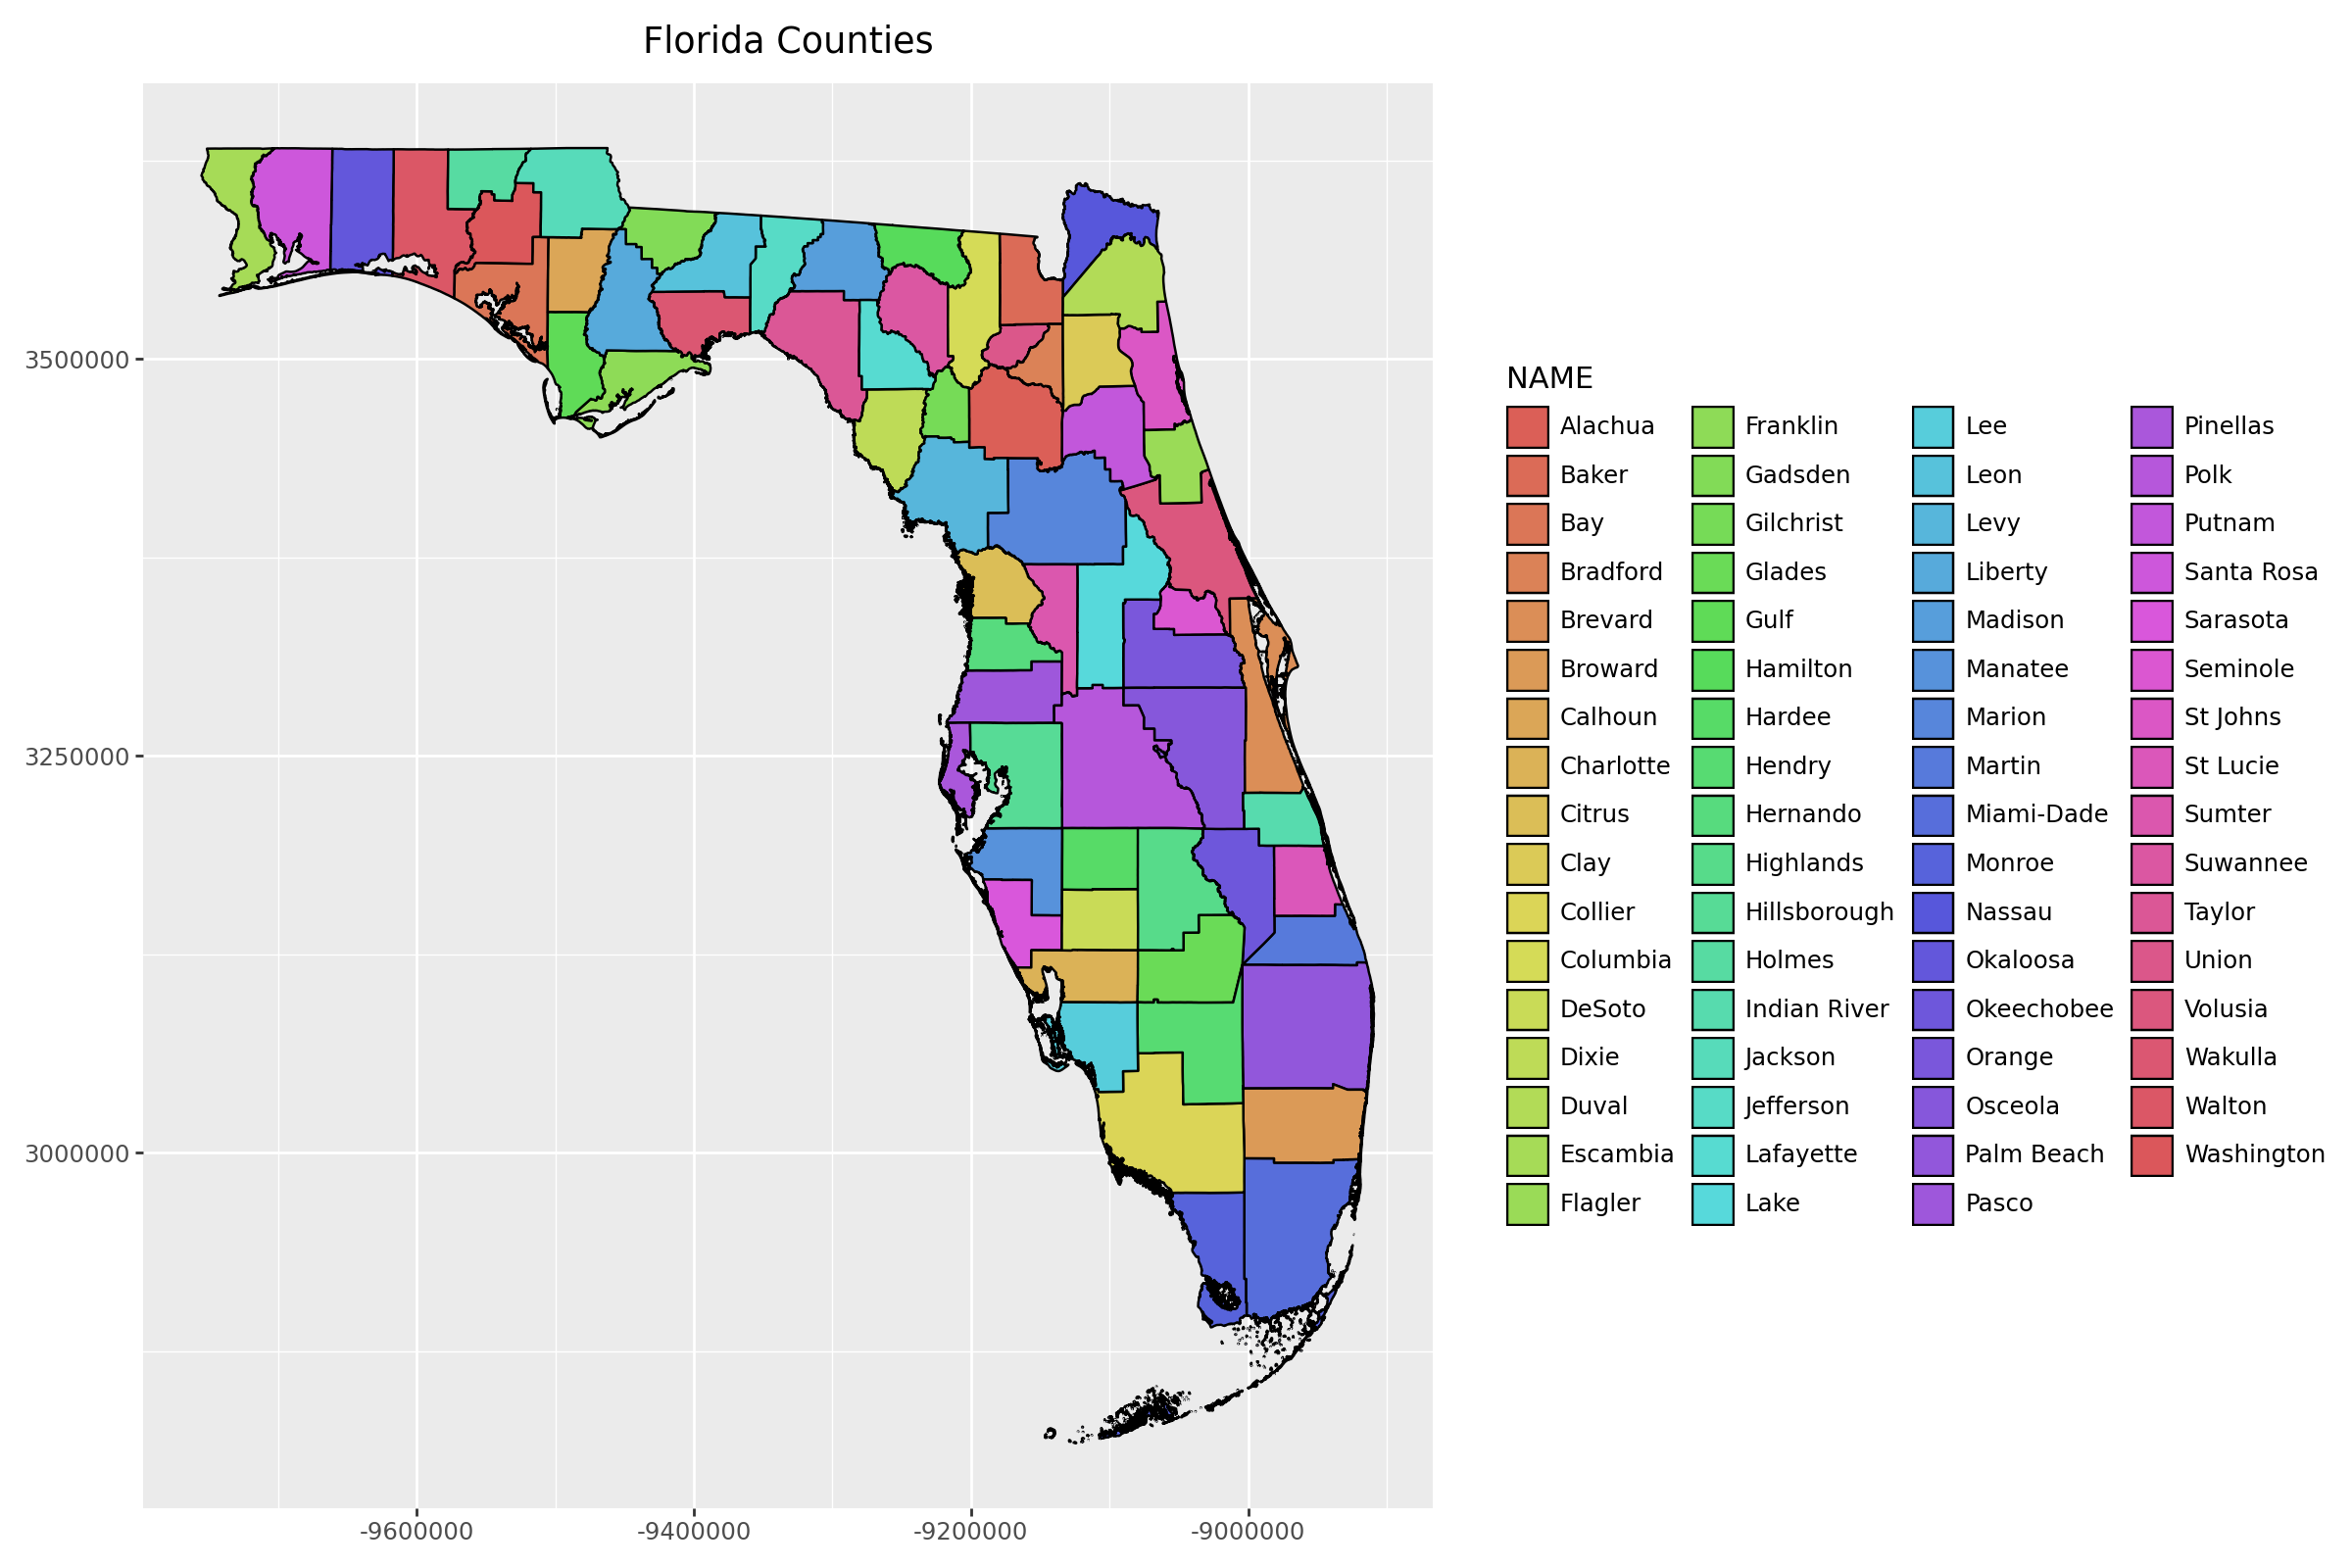

In [19]:
import geopandas as gpd
mapflorida = gpd.read_file('/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.shp')

(
    ggplot(data = mapflorida) +
    geom_map(aes(map_id=mapflorida.index, geometry=mapflorida.geometry, fill='NAME'), 
             data=mapflorida, color="black") +   
    labs(title="Florida Counties") +
    #scale is very off adjust the size of this
    theme(figure_size=(12,8))
)


# Map of Florida's Original Districts

This is what Florida's original districts looks like. Notice that 

![](https://www.floridacoaches.org/uploads/1/0/7/7/107786351/statedistrictmap_orig.jpg)

# Map of Florida's Revised Districts

Here, we grouped the revised districts and printed them with GPD

District 0.0: ['Escambia', 'Walton', 'Santa Rosa', 'Okaloosa']
District 1.0: ['Gilchrist', 'Taylor', 'Liberty', 'Franklin', 'Bay', 'Gulf', 'Lafayette', 'Dixie', 'Suwannee', 'Levy']
District 2.0: ['Bradford', 'Clay', 'Union', 'Putnam']
District 4.0: ['Hamilton', 'Madison', 'Baker', 'Jefferson']
District 5.0: ['Calhoun', 'Volusia', 'Flagler']
District 7.0: ['Indian River', 'Columbia']
District 8.0: ['Washington']
District 10.0: ['Hernando', 'Alachua', 'Citrus']
District 11.0: ['Sumter', 'Jackson']
District 12.0: ['Osceola', 'Gadsden']
District 14.0: ['Holmes']
District 15.0: ['Manatee', 'Brevard']
District 16.0: ['Glades', 'Highlands', 'Pasco', 'Hardee', 'Sarasota', 'Charlotte', 'Okeechobee']
District 17.0: ['Martin']
District 18.0: ['Lee']
District 20.0: ['Duval', 'Seminole', 'Lake']
District 21.0: ['Nassau']
District 22.0: ['Marion', 'Leon']
District 23.0: ['Wakulla', 'Pinellas', 'Broward', 'Palm Beach']
District 24.0: ['Hendry', 'Hillsborough', 'Collier', 'Polk']
District 25.0: ['Monr

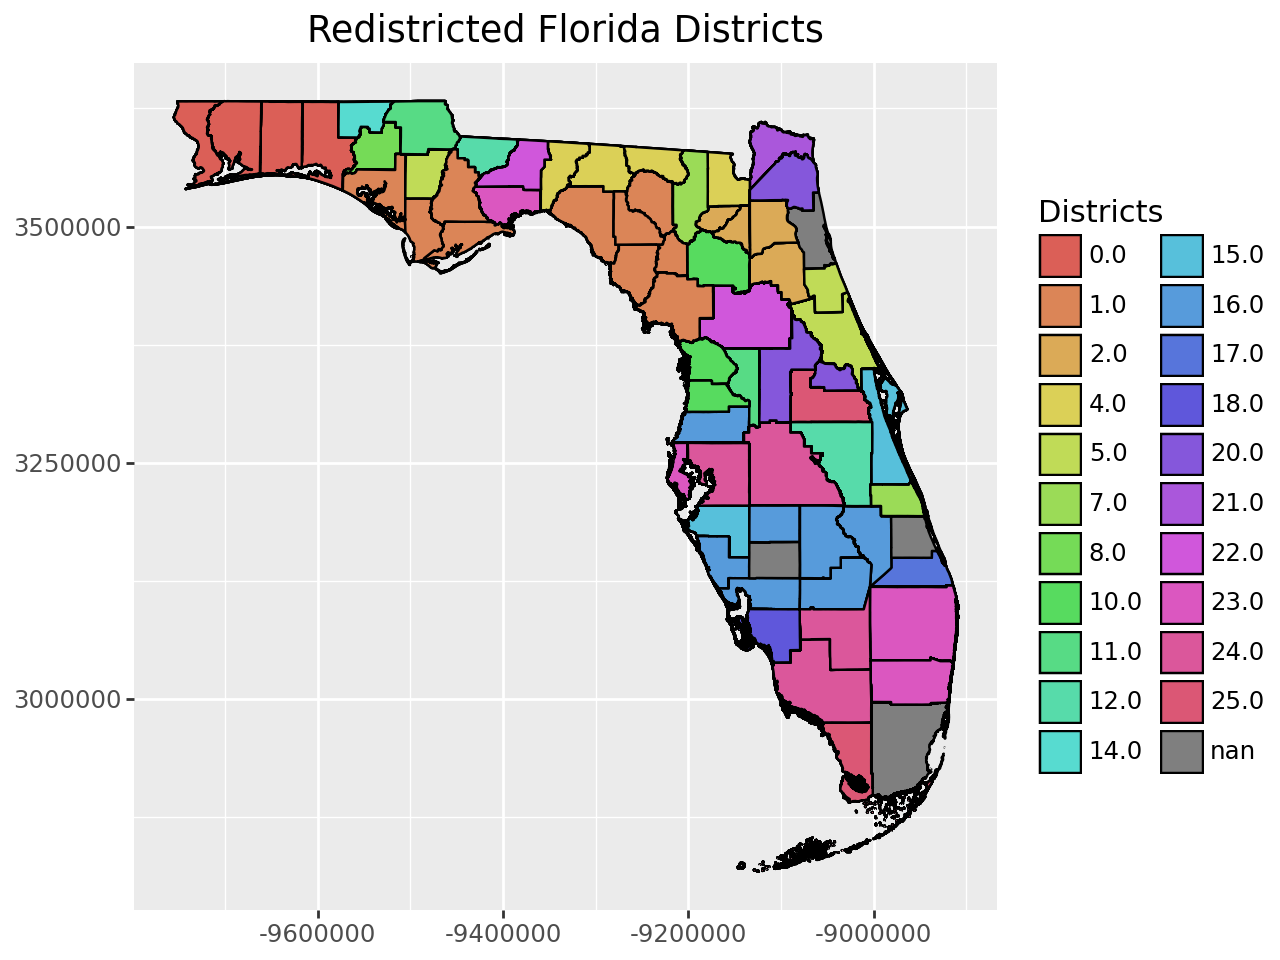

In [20]:
# Group counties by optimized districts
district_counties = (
    newmapflorida.groupby("Optimized_District")["COUNTY"]
    .apply(lambda x: list(set(x))).to_dict()
)

# Print the districts and their counties as ref
for district, counties in district_counties.items():
    print(f"District {district}: {counties}")


# gpd read
mapflorida = gpd.read_file('/kaggle/input/florida-shape/FloridaCountyBoundarieswithFDOTDistricts.shp')

# Merge the optimized districts to gpd newmap
mapflorida = mapflorida.merge(
    newmapflorida[['COUNTY', 'Optimized_District']],
    how='left',
    left_on='County', 
    right_on='COUNTY'  
)

# Keep getting type error. change
mapflorida['Optimized_District'] = mapflorida['Optimized_District'].astype('category')


(
    ggplot(data=mapflorida) +
    geom_map(
        aes(map_id=mapflorida.index,geometry=mapflorida.geometry, fill='Optimized_District'),
        data=mapflorida,
        color="black"
    ) +
    scale_fill_hue(name="Districts") +  
    labs(title="Redistricted Florida Districts") 
)

# Conclusion


We found that our attempt to redistrict gerrymandering was successful in creating a more fair way of creating voting districts based off of census data of voters and proximity. The initial scoring for Florida’s districting was 283.47, and after our redistricting, Florida’s score changed to 57.50. Our original hypothesis was found to be accurate, that there is a possible fairer districting of Florida compared to the current method, using a modified traveling salesperson model for optimizing and swapping counties in districts.



# Future Work
There is many areas where there can be future work on this redistrciting model. More categories of voting can be considered, such as sexual orientation, previous voting habits along alternate techniques, etc. to ensure more accurate voter representation. 
In evaluating fairness, too, more work can be done. It is a difficult task to determine whether or not a district has been fairly drawn. What standards ought to e met, which categories to considered and with what weight they hold are important factors that need further research.

# References

first dataset is from https://redistrictingdatahub.org/dataset/2022-florida-l2-voter-file-elections-turnout-statistics-aggregated-to-counties/

Our second https://github.com/kelvins/US-Cities-Database/blob/main/csv/us_cities.csv?plain=1

We found ways to evaluated fairness in gerrymandering here: https://statics.teams.cdn.office.net/evergreen-assets/safelinks/1/atp-safelinks.html

Our method including local search and simulated annealing are based on these models: https://www.kaggle.com/code/markgoadrich/local-search-algorithms